In [1]:
#installing spark
!pip install Spark

In [2]:
#installing pyspark 
!pip install pyspark
!pip install findspark

In [3]:
#importing spark
from pyspark.shell import spark

Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 3.3.0
      /_/

Using Python version 3.9.12 (main, Apr  4 2022 05:22:27)
Spark context Web UI available at http://TS-STUDENT-5016.uic.edu:4040
Spark context available as 'sc' (master = local[*], app id = local-1668886736381).
SparkSession available as 'spark'.


In [4]:
#importing pyspark and pandas
import pyspark
import pandas as pd
from pyspark import SparkContext, SQLContext

In [5]:
# Installing findspark - a python library to find Spark
!pip install -q findspark

In [6]:
##Create spark session
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [7]:
import os
os.environ["JAVA_HOME"] = "C:/Program Files/Java/jdk1.8.0_341-amd64"
os.environ["SPARK_HOME"] = "C:/Users/amanka5/Spark/spark-3.3.0-bin-hadoop2"

Step  1.	Import the Iris dataset

In [8]:
#loading the iris dataset
data = spark.read.csv('C:/Users/amanka5/Desktop/iris.csv', header = None)

In [9]:
#check the dataset
data.show(5)

+---+---+---+---+-----------+
|_c0|_c1|_c2|_c3|        _c4|
+---+---+---+---+-----------+
|5.1|3.5|1.4|0.2|Iris-setosa|
|4.9|3.0|1.4|0.2|Iris-setosa|
|4.7|3.2|1.3|0.2|Iris-setosa|
|4.6|3.1|1.5|0.2|Iris-setosa|
|5.0|3.6|1.4|0.2|Iris-setosa|
+---+---+---+---+-----------+
only showing top 5 rows



In [10]:
#renaming the columns
data = data.withColumnRenamed("_c0", "sepal_length")
data = data.withColumnRenamed("_c1", "sepal_width")
data = data.withColumnRenamed("_c2", "petal_length")
data = data.withColumnRenamed("_c3", "petal_width")
data = data.withColumnRenamed("_c4", "species")


data.show()

+------------+-----------+------------+-----------+-----------+
|sepal_length|sepal_width|petal_length|petal_width|    species|
+------------+-----------+------------+-----------+-----------+
|         5.1|        3.5|         1.4|        0.2|Iris-setosa|
|         4.9|        3.0|         1.4|        0.2|Iris-setosa|
|         4.7|        3.2|         1.3|        0.2|Iris-setosa|
|         4.6|        3.1|         1.5|        0.2|Iris-setosa|
|         5.0|        3.6|         1.4|        0.2|Iris-setosa|
|         5.4|        3.9|         1.7|        0.4|Iris-setosa|
|         4.6|        3.4|         1.4|        0.3|Iris-setosa|
|         5.0|        3.4|         1.5|        0.2|Iris-setosa|
|         4.4|        2.9|         1.4|        0.2|Iris-setosa|
|         4.9|        3.1|         1.5|        0.1|Iris-setosa|
|         5.4|        3.7|         1.5|        0.2|Iris-setosa|
|         4.8|        3.4|         1.6|        0.2|Iris-setosa|
|         4.8|        3.0|         1.4| 

In [11]:
iris_data = data

In [12]:
#count the data
iris_data.count()

150

In [13]:
#checking the columns
len(iris_data.columns)

5

In [14]:
iris_data.printSchema()

root
 |-- sepal_length: string (nullable = true)
 |-- sepal_width: string (nullable = true)
 |-- petal_length: string (nullable = true)
 |-- petal_width: string (nullable = true)
 |-- species: string (nullable = true)



In [15]:
iris_data = iris_data.withColumn("sepal_length",iris_data.sepal_length.cast('double'))
iris_data = iris_data.withColumn("sepal_width",iris_data.sepal_width.cast('double'))
iris_data = iris_data.withColumn("petal_length",iris_data.petal_length.cast('double'))
iris_data = iris_data.withColumn("petal_width",iris_data.petal_width.cast('double'))


In [16]:
iris_data.printSchema()

root
 |-- sepal_length: double (nullable = true)
 |-- sepal_width: double (nullable = true)
 |-- petal_length: double (nullable = true)
 |-- petal_width: double (nullable = true)
 |-- species: string (nullable = true)



In [17]:
iris_data.describe().show(5)

+-------+------------------+-------------------+------------------+------------------+--------------+
|summary|      sepal_length|        sepal_width|      petal_length|       petal_width|       species|
+-------+------------------+-------------------+------------------+------------------+--------------+
|  count|               150|                150|               150|               150|           150|
|   mean| 5.843333333333335| 3.0540000000000007|3.7586666666666693|1.1986666666666672|          null|
| stddev|0.8280661279778637|0.43359431136217375| 1.764420419952262|0.7631607417008414|          null|
|    min|               4.3|                2.0|               1.0|               0.1|   Iris-setosa|
|    max|               7.9|                4.4|               6.9|               2.5|Iris-virginica|
+-------+------------------+-------------------+------------------+------------------+--------------+



In [18]:
iris_data.head(5)

[Row(sepal_length=5.1, sepal_width=3.5, petal_length=1.4, petal_width=0.2, species='Iris-setosa'),
 Row(sepal_length=4.9, sepal_width=3.0, petal_length=1.4, petal_width=0.2, species='Iris-setosa'),
 Row(sepal_length=4.7, sepal_width=3.2, petal_length=1.3, petal_width=0.2, species='Iris-setosa'),
 Row(sepal_length=4.6, sepal_width=3.1, petal_length=1.5, petal_width=0.2, species='Iris-setosa'),
 Row(sepal_length=5.0, sepal_width=3.6, petal_length=1.4, petal_width=0.2, species='Iris-setosa')]

In [19]:
#groupby the species column
iris_data.groupBy("species").count().show()

+---------------+-----+
|        species|count|
+---------------+-----+
| Iris-virginica|   50|
|    Iris-setosa|   50|
|Iris-versicolor|   50|
+---------------+-----+



All species have 50 samples

In [20]:
#groupby the sepal_length column
iris_data.groupBy("sepal_length").count().show()

+------------+-----+
|sepal_length|count|
+------------+-----+
|         5.4|    6|
|         7.0|    1|
|         6.1|    6|
|         7.7|    4|
|         6.6|    2|
|         4.5|    1|
|         5.7|    8|
|         6.7|    8|
|         7.4|    1|
|         6.5|    5|
|         4.9|    6|
|         6.2|    4|
|         5.1|    9|
|         7.3|    1|
|         4.3|    1|
|         7.9|    1|
|         4.7|    2|
|         5.3|    1|
|         7.2|    3|
|         7.6|    1|
+------------+-----+
only showing top 20 rows



2.	Build a K-means model to classify the species of Iris. You can choose a k value randomly at this step

In [21]:
from pyspark.ml.linalg import Vector
from pyspark.ml.feature import VectorAssembler


In [22]:
iris_data.columns

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [23]:
input_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [24]:
#create a vector assembler and a output column with vector
vector_assembler = VectorAssembler(inputCols = input_cols, outputCol = 'iris_features')

In [25]:
#transform the data
final_data = vector_assembler.transform(iris_data)

In [26]:
final_data.show()

+------------+-----------+------------+-----------+-----------+-----------------+
|sepal_length|sepal_width|petal_length|petal_width|    species|    iris_features|
+------------+-----------+------------+-----------+-----------+-----------------+
|         5.1|        3.5|         1.4|        0.2|Iris-setosa|[5.1,3.5,1.4,0.2]|
|         4.9|        3.0|         1.4|        0.2|Iris-setosa|[4.9,3.0,1.4,0.2]|
|         4.7|        3.2|         1.3|        0.2|Iris-setosa|[4.7,3.2,1.3,0.2]|
|         4.6|        3.1|         1.5|        0.2|Iris-setosa|[4.6,3.1,1.5,0.2]|
|         5.0|        3.6|         1.4|        0.2|Iris-setosa|[5.0,3.6,1.4,0.2]|
|         5.4|        3.9|         1.7|        0.4|Iris-setosa|[5.4,3.9,1.7,0.4]|
|         4.6|        3.4|         1.4|        0.3|Iris-setosa|[4.6,3.4,1.4,0.3]|
|         5.0|        3.4|         1.5|        0.2|Iris-setosa|[5.0,3.4,1.5,0.2]|
|         4.4|        2.9|         1.4|        0.2|Iris-setosa|[4.4,2.9,1.4,0.2]|
|         4.9|  

In [27]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

In [28]:
#calling the input feature column and there are 3 categories, considering here k = 3
kmeans = KMeans(featuresCol= 'iris_features', k = 3)

In [29]:
#train the kmeans model
model = kmeans.fit(final_data)

In [30]:
#checking model
model

KMeansModel: uid=KMeans_b13e9ec9e1b4, k=3, distanceMeasure=euclidean, numFeatures=4

In [31]:
#calculating the prediction for each species
model.transform(final_data).groupBy("prediction").count().show()

+----------+-----+
|prediction|count|
+----------+-----+
|         1|   50|
|         2|   61|
|         0|   39|
+----------+-----+



From above, Cluster 1 is the best cluster, it found all the categories correct

In [32]:
#save the result in new variable 'predictions'
predictions = model.transform(final_data)

In [33]:
#getting the new column 'predictions'
predictions.show()

+------------+-----------+------------+-----------+-----------+-----------------+----------+
|sepal_length|sepal_width|petal_length|petal_width|    species|    iris_features|prediction|
+------------+-----------+------------+-----------+-----------+-----------------+----------+
|         5.1|        3.5|         1.4|        0.2|Iris-setosa|[5.1,3.5,1.4,0.2]|         1|
|         4.9|        3.0|         1.4|        0.2|Iris-setosa|[4.9,3.0,1.4,0.2]|         1|
|         4.7|        3.2|         1.3|        0.2|Iris-setosa|[4.7,3.2,1.3,0.2]|         1|
|         4.6|        3.1|         1.5|        0.2|Iris-setosa|[4.6,3.1,1.5,0.2]|         1|
|         5.0|        3.6|         1.4|        0.2|Iris-setosa|[5.0,3.6,1.4,0.2]|         1|
|         5.4|        3.9|         1.7|        0.4|Iris-setosa|[5.4,3.9,1.7,0.4]|         1|
|         4.6|        3.4|         1.4|        0.3|Iris-setosa|[4.6,3.4,1.4,0.3]|         1|
|         5.0|        3.4|         1.5|        0.2|Iris-setosa|[5.0,3.

In [34]:
#groupby the species column with the prediction
predictions.groupBy('species', 'prediction').count().show()

+---------------+----------+-----+
|        species|prediction|count|
+---------------+----------+-----+
|    Iris-setosa|         1|   50|
|Iris-versicolor|         2|   47|
|Iris-versicolor|         0|    3|
| Iris-virginica|         0|   36|
| Iris-virginica|         2|   14|
+---------------+----------+-----+



From above, the 'setosa' species is perfectly grouped in 1 cluster.  'versicolor' species is also clustered in almost one group, only 3 samples are misclustered.

3. Report the original performance using Silhouette score

In [35]:
from pyspark.ml.feature import StandardScaler

In [36]:
#standardizing the data
scale = StandardScaler(inputCol='iris_features', outputCol='standardized')
scale_data = scale.fit(final_data)
scale_data_output = scale_data.transform(final_data)
scale_data_output.show()

+------------+-----------+------------+-----------+-----------+-----------------+--------------------+
|sepal_length|sepal_width|petal_length|petal_width|    species|    iris_features|        standardized|
+------------+-----------+------------+-----------+-----------+-----------------+--------------------+
|         5.1|        3.5|         1.4|        0.2|Iris-setosa|[5.1,3.5,1.4,0.2]|[6.15892840883878...|
|         4.9|        3.0|         1.4|        0.2|Iris-setosa|[4.9,3.0,1.4,0.2]|[5.9174018045706,...|
|         4.7|        3.2|         1.3|        0.2|Iris-setosa|[4.7,3.2,1.3,0.2]|[5.67587520030241...|
|         4.6|        3.1|         1.5|        0.2|Iris-setosa|[4.6,3.1,1.5,0.2]|[5.55511189816831...|
|         5.0|        3.6|         1.4|        0.2|Iris-setosa|[5.0,3.6,1.4,0.2]|[6.03816510670469...|
|         5.4|        3.9|         1.7|        0.4|Iris-setosa|[5.4,3.9,1.7,0.4]|[6.52121831524107...|
|         4.6|        3.4|         1.4|        0.3|Iris-setosa|[4.6,3.4,1

In [44]:
#Evaluate clustering by computing Silhouette score
model1 = ClusteringEvaluator(featuresCol='iris_features',metricName='silhouette', distanceMeasure='squaredEuclidean')

silhouette = model1.evaluate(predictions)
print("The Silhouette Score is " + str(silhouette))

The Silhouette Score is 0.7342113066202725


4.Try to improve the performance of the original model by trying at least 10 different k values.

In [53]:
#set the parameters
silhouette_score=[]
silhouette_max = 0
kmax = 0
evaluator = ClusteringEvaluator(predictionCol = 'prediction', featuresCol='iris_features', \
                                metricName='silhouette', distanceMeasure='squaredEuclidean')
for i in range(2,12):
    #train the model
    KMeans_algo=KMeans(featuresCol='iris_features', k=i)
    
    KMeans_fit=KMeans_algo.fit(scale_data_output)
    
    output=KMeans_fit.transform(scale_data_output)
    
    
    #evaluating the clustering with silhouette score
    score = evaluator.evaluate(output)
    
    silhouette_score.append(score)
    
    print("Silhouette Score:",score)
    
    
    if score > silhouette_max:
      silhouette_max = score
      kmax = i

Silhouette Score: 0.8501515983265806
Silhouette Score: 0.7342113066202725
Silhouette Score: 0.6711848003790326
Silhouette Score: 0.5564096426697706
Silhouette Score: 0.5517166229578094
Silhouette Score: 0.5341903867213635
Silhouette Score: 0.5147607062512977
Silhouette Score: 0.4317985879610285
Silhouette Score: 0.46114155198240014
Silhouette Score: 0.4517349811451314


#above are the 10 different values of k 

5. Select the best k based on step 4 and print out the following sentence in your code:
“k=xx gives the best performance, Silhouette =xx "


In [54]:
print("k="+ str(kmax) + " gives the best performance, Silhouette = "+ str(silhouette_max))

k=2 gives the best performance, Silhouette = 0.8501515983265806


Text(0, 0.5, 'Silhouette Score')

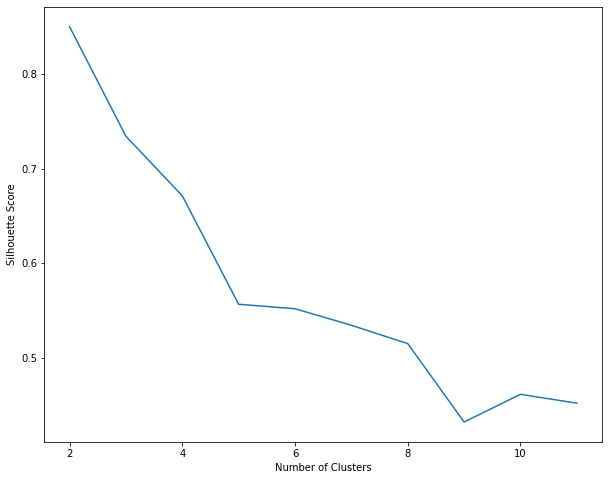

In [55]:
#graphical representation to check k value
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize =(10,8))
ax.plot(range(2,12),silhouette_score)
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Silhouette Score')

We can see that the local maximum is at K=3 i.e. 3 clusters will give us the best results